# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [9]:
# your code here
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

In [98]:
dataa = pd.read_excel("Online Retail.xlsx",engine="openpyxl")

In [231]:
cleaned = dataa[(dataa.Country != "Israel")&(dataa.UnitPrice > 0)& (dataa.Quantity > 0) & (dataa.CustomerID.notna()) & (~dataa.StockCode.isin(["AMAZONFEE","M","B","POST","DOT","D","CRUK","BANK CHARGES","PADS"]))]

In [223]:
#cleaned.sort_values("Quantity",ascending=True).drop_duplicates("StockCode")
#cleaned.drop_duplicates("StockCode").sort_values("UnitPrice")

In [286]:
unique = cleaned[cleaned.Country!= "Israel"]
#unique.loc[(unique["UnitPrice"]>0) & (unique["Quantity"]>0)].sort_values("UnitPrice",ascending=False)

In [263]:
nodupe = cleaned[cleaned.Country!= "Israel"].drop_duplicates("InvoiceNo")
x = nodupe.groupby("Country").count().sort_values("StockCode",ascending=False)
x.assign(Purchases = x.InvoiceNo)["Purchases"]


Country
United Kingdom          16579
Germany                   443
France                    380
EIRE                      258
Belgium                    98
Netherlands                93
Spain                      88
Australia                  56
Portugal                   49
Switzerland                47
Finland                    40
Italy                      35
Sweden                     34
Norway                     32
Channel Islands            25
Poland                     19
Japan                      19
Denmark                    18
Austria                    17
Cyprus                     14
Unspecified                 8
Iceland                     7
Canada                      5
USA                         5
Malta                       5
Greece                      5
Singapore                   4
Lithuania                   4
European Community          3
Bahrain                     2
Czech Republic              2
United Arab Emirates        2
Lebanon                     1
Br

In [245]:
unique.drop_duplicates("Description").sort_values("Quantity")[:485]
items = unique.groupby(["Description"],dropna=True).count().sort_values(by="Quantity",ascending=False)
total=cleaned.sort_values(by="Quantity",ascending=False)
dataset = total[(total.UnitPrice>0) &(total.Quantity>0)]
#totalpricequantity = totalprice[]
dataset
#[["Description","Quantity","UnitPrice"]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
...,...,...,...,...,...,...,...,...
285672,561917,15044C,PURPLE PAPER PARASOL,1,2011-08-01 11:57:00,2.95,16904.0,United Kingdom
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748.0,United Kingdom
541856,581580,22698,PINK REGENCY TEACUP AND SAUCER,1,2011-12-09 12:20:00,2.95,12748.0,United Kingdom
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748.0,United Kingdom


In [327]:
print("Total cost of each order\n")
averageorders = dataset.assign(ordertotal = dataset.Quantity*dataset.UnitPrice).groupby("InvoiceNo").sum(numeric_only=True)
print(averageorders["ordertotal"],"\n\nAOV is", averageorders["ordertotal"].mean())


Total cost of each order

InvoiceNo
536365    139.12
536366     22.20
536367    278.73
536368     70.05
536369     17.85
           ...  
581583    124.60
581584    140.64
581585    329.05
581586    339.20
581587    249.45
Name: ordertotal, Length: 18400, dtype: float64 

AOV is 476.1158130434782


Total profit of top 10 products


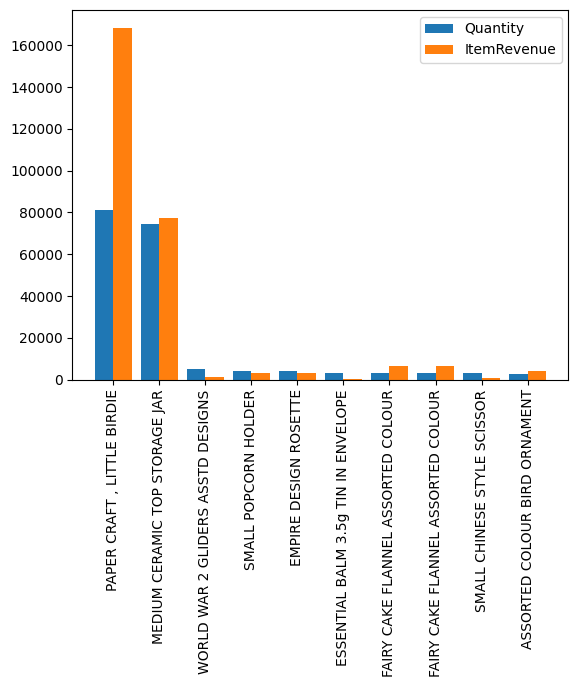

In [336]:
Freq = dataset[["Description","Quantity","UnitPrice"]]
Freq["Description"]
Freq[:10]
w, x = 0.4, np.arange(10)

fig, ax = plt.subplots()
ax.bar(x - w/2, Freq["Quantity"][:10], width=w, label='Quantity')
ax.bar(x + w/2,Freq["Quantity"][:10]*Freq["UnitPrice"][:10], width=w, label='ItemRevenue')
ax.set_xticks(x)
ax.set_xticklabels(Freq["Description"][:10],rotation="vertical")
ax.legend()

print("Total profit of top 10 products")
plt.show()



Same graph without two highest products


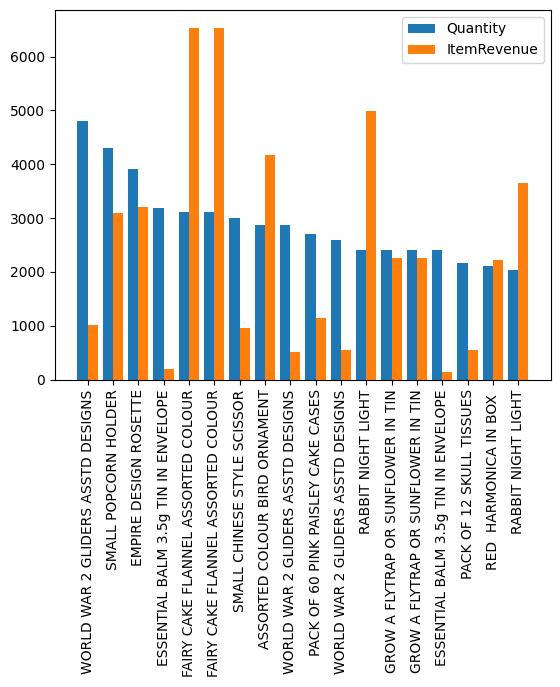

In [319]:
w, x = 0.4, np.arange(18)

fig, ax = plt.subplots()
ax.bar(x - w/2, Freq["Quantity"][2:20], width=w, label='Quantity')
ax.bar(x + w/2,Freq["Quantity"][2:20]*Freq["UnitPrice"][2:20], width=w, label='ItemRevenue')
ax.set_xticks(x)
ax.set_xticklabels(Freq["Description"][2:20],rotation="vertical")
ax.legend()

print("Same graph without two highest products")
plt.show()



In [320]:
pricesort = dataset[["Quantity","UnitPrice"]][dataset.Quantity>0].sort_values("UnitPrice",ascending=False)
#pricesort[pricesort.UnitPrice >0]

In [321]:
grouping = dataset[dataset.Quantity >0].copy()
#grouping

In [322]:
plotting = dataset[["Description","Quantity","UnitPrice","Country"]].assign(itemrevenue = dataset.Quantity*dataset.UnitPrice)
#plotting


In [271]:
expenditures = dataset.assign(countryspending = dataset.Quantity*dataset.UnitPrice)
allexpenditures = expenditures.groupby("Country").sum("countryspending").sort_values("countryspending",ascending=False)["countryspending"]

<Axes: title={'center': 'Total Spending by Country'}, xlabel='Country', ylabel='Total Spent'>

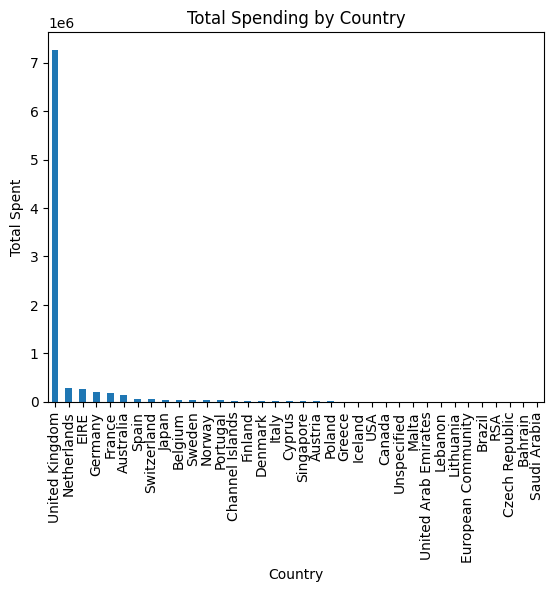

In [285]:
allexpenditures[:].plot(kind="bar",title="Total Spending by Country",ylabel="Total Spent")


Without the UK


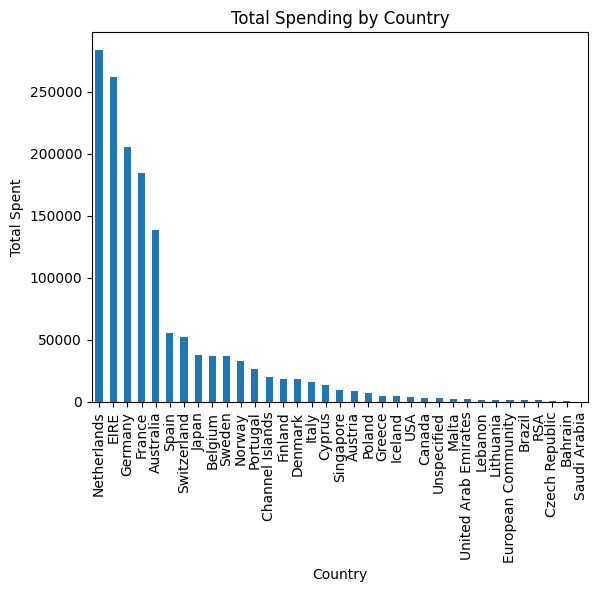

In [324]:
allexpenditures[1:].plot(kind="bar",title="Total Spending by Country",ylabel="Total Spent")
print("Without the UK")

<Axes: xlabel='Country'>

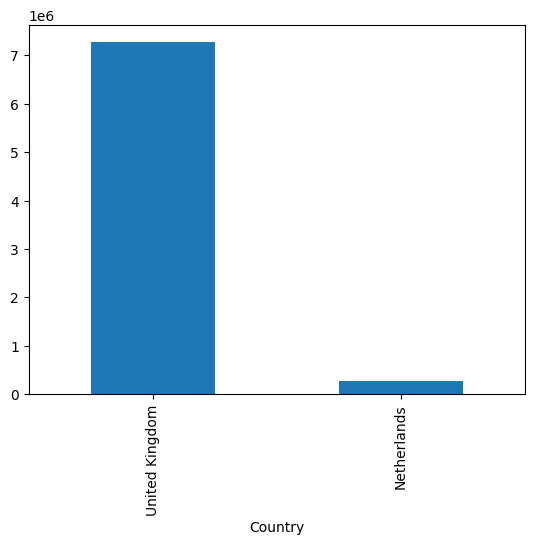

In [284]:
allexpenditures[0:2].plot(kind="bar")

In [330]:
#dataset.drop_duplicates("InvoiceNo")

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
...,...,...,...,...,...,...,...,...
369779,569099,20682,RED RETROSPOT CHILDRENS UMBRELLA,1,2011-09-30 12:12:00,3.25,17961.0,United Kingdom
287074,562047,22193,RED DINER WALL CLOCK,1,2011-08-02 10:38:00,8.50,17788.0,United Kingdom
285139,561895,21124,SET/10 BLUE POLKADOT PARTY CANDLES,1,2011-07-31 15:04:00,1.25,12748.0,United Kingdom
103352,545061,21476,STEEL SWEETHEART ROUND TABLE CREAM,1,2011-02-27 13:52:00,14.95,15547.0,United Kingdom


In [337]:
print("Other useful things to model are # of orders over the available dates and distribution of customers in each country")

Other useful things to model are # of orders over the available dates and distribution of customers in each country
